Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Size             30 non-null     int64 
 1   Location         30 non-null     object
 2   Number of Rooms  30 non-null     int64 
 3   Price            30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB
None

 First 5 rows of the dataset:


,Size,Number of Rooms,Price
count,30.000000,30.000000,30.000000
mean,1496.666667,3.300000,254166.666667
std,405.550569,1.118805,112824.882109
min,800.000000,1.000000,90000.000000
25%,1162.500000,2.250000,128750.000000
50%,1500.000000,3.000000,257500.000000
75%,1837.500000,4.000000,357500.000000
max,2200.000000,5.000000,430000.000000



 Missing Values:
Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64

Dataset after encoding:
   Size  Number of Rooms     Price  Location_suburban  Location_urban
0  1200                3  250000.0              False            True
1  1800                4  320000.0               True           False
2   950                2  120000.0              False           False
3  2000                5  410000.0              False            True
4  1500                3  270000.0               True           False
Training set size: (24, 4)
Testing set size: (6, 4)
Model Coefficients: [188020.17128001  80639.13442422  55829.17604265  95178.9646735 ]
Intercept: 67778.73418827704
RMSE: 25506.22
R²: 0.96


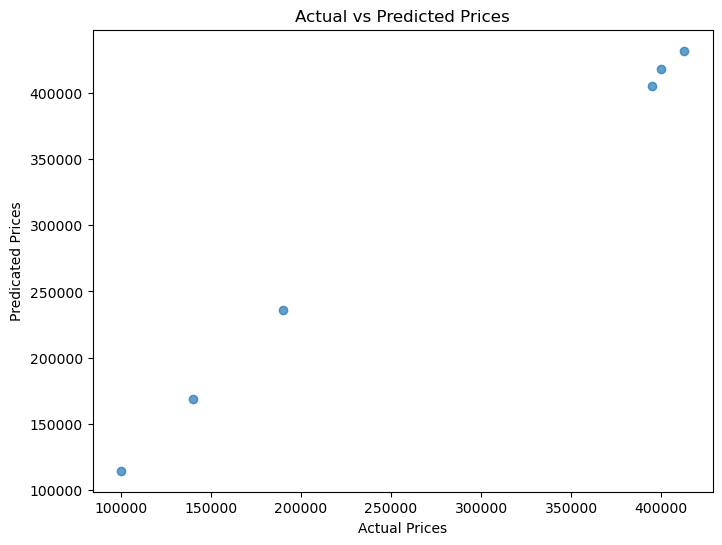

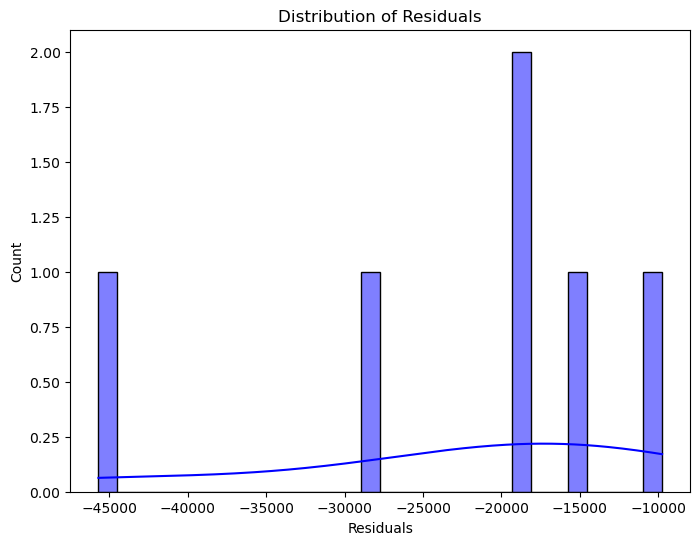

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as mlt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('house_prices.csv')
print('Dataset Information')
print(df.info())

print('\n First 5 rows of the dataset:')
display(df.describe())

print("\n Missing Values:")
print(df.isnull().sum())
 
# Fix: Use inplace=True to modify the dataframe
df['Size'].fillna(df['Size'].median())
df['Number of Rooms'].fillna(df['Number of Rooms'].median())

# potential outliers that might skew
upper_limit = df['Price'].quantile(0.95)
df['Price'] = np.where(df['Price'] > upper_limit, upper_limit, df['Price'])

df = pd.get_dummies(df, columns = ['Location'], drop_first = True)
print('\nDataset after encoding:')
print(df.head())

from sklearn.preprocessing import MinMaxScaler

scaler  = MinMaxScaler()
df[['Size','Number of Rooms']] = scaler.fit_transform(df[['Size','Number of Rooms']])

X = df.drop('Price', axis = 1)
y = df['Price']

# Fix: Corrected the variable assignment for y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

model = LinearRegression()
model.fit(X_train, y_train)

print('Model Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

# Scatter plot of actual vs predicted prices
mlt.figure(figsize =(8,6))
mlt.scatter(y_test, y_pred, alpha = 0.7)
mlt.title('Actual vs Predicted Prices')
mlt.xlabel('Actual Prices')
mlt.ylabel('Predicated Prices')
mlt.show()

# Residuaol plot 
residuals = y_test - y_pred
mlt.figure(figsize = (8,6))
sns.histplot(residuals, kde = True, bins = 30, color = 'blue')
mlt.title('Distribution of Residuals')
mlt.xlabel('Residuals')
mlt.show()